In [1]:
import numpy as np
import ceo
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
D = 25.5
nPx = 101
nSrc = 5
src  = ceo.Source("V", zenith=ceo.constants.ARCMIN2RAD*np.linspace(0,1,nSrc),
                  azimuth = np.ones(nSrc)*np.pi/4,
                  rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25.0])
gmt = ceo.GMT_MX(D,nPx)

array([ 0.00075936,  0.00698918,  0.01779409,  0.03429989,  0.056898  ])

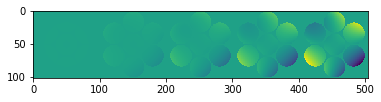

In [37]:
~src
gmt.propagate(src,where_to='exit pupil')
plt.imshow(np.hstack(np.vsplit(src.phase.host(),nSrc)))
src.wavefront.rms(-6)

In [38]:
~src
gmt.propagate(src,where_to='focal plane')
xyzChief = src.rays.chief_coordinates.host()*1e6
print xyzChief
xyz = src.rays.coordinates.host().reshape(nSrc,nPx**2,3)*1e6
V = src.rays.vignetting.host()==1

[[  6.49209555e-24  -2.71373206e-09  -5.82999992e+06]
 [ -1.06747054e+04  -1.06747054e+04  -5.83005179e+06]
 [ -2.13495568e+04  -2.13495568e+04  -5.83020738e+06]
 [ -3.20247000e+04  -3.20247000e+04  -5.83046675e+06]
 [ -4.27002812e+04  -4.27002812e+04  -5.83082993e+06]]


In [39]:
diffraction = src.wavelength/25.5*ceo.constants.RAD2MAS
o = np.linspace(0,2*np.pi,101)
x = 0.5*diffraction*np.cos(o)
y = 0.5*diffraction*np.sin(o)

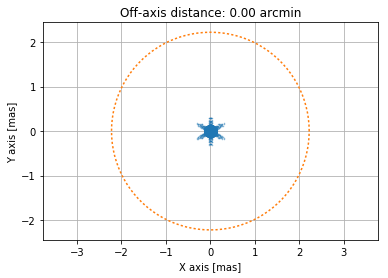

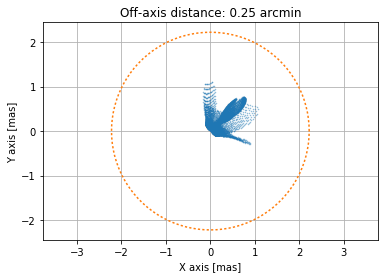

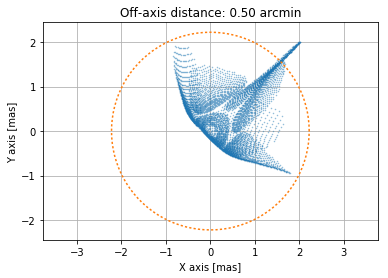

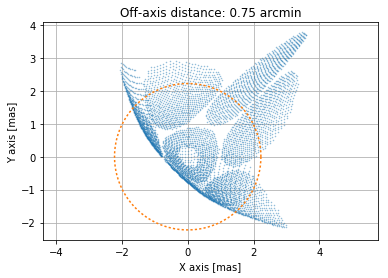

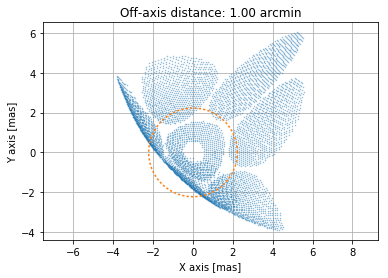

In [45]:
for k in range(nSrc):
    xo = src.zenith[k]*ceo.constants.RAD2MAS
    fig,ax = plt.subplots()
    ax.plot(xyz[k,V[k,:],0]-xyzChief[k,0],xyz[k,V[k,:],1]-xyzChief[k,1],'.',markersize=1,alpha=0.5)
    ax.plot(x,y,'C1:')
    ax.axis('equal')
    ax.grid()
    ax.set_title('Off-axis distance: %.2f arcmin'%(src.zenith[k]*ceo.constants.RAD2ARCMIN))
    ax.set_xlabel('X axis [mas]')
    ax.set_ylabel('Y axis [mas]')